## Putting it all together

In [1]:
import seaborn as sns; sns.set_style("dark")
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import janitor
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNetCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import janitor

In [2]:
data = pd.read_csv("data/bankchurnersuse.csv").clean_names()

In [3]:
data

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
train, test = train_test_split(data, random_state = 10, train_size = 0.8, stratify = data["attrition_flag"])

In [5]:
train, test_init = train_test_split(train, random_state = 10, train_size = 0.8, stratify = train["attrition_flag"])

In [6]:
train.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2147,770882508,Existing Customer,38,M,2,College,Married,$80K - $120K,Blue,24,...,1,5,17162.0,773,16389.0,1.238,2457,54,1.000,0.045
7967,712200033,Existing Customer,44,F,4,High School,Single,Less than $40K,Blue,36,...,3,3,3024.0,0,3024.0,0.750,4983,78,0.733,0.000
9892,806917983,Existing Customer,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,3,1,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045
7983,715463133,Existing Customer,40,M,5,High School,Single,$120K +,Blue,31,...,1,3,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041
5638,711824358,Existing Customer,44,F,4,College,Single,Less than $40K,Blue,31,...,3,2,3228.0,0,3228.0,0.747,4524,70,0.667,0.000


In [7]:
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
3933,815240358,Existing Customer,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2790,779284833,Existing Customer,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,3,1,22127.0,1799,20328.0,0.758,3591,63,0.750,0.081
8663,719658858,Existing Customer,50,F,4,Doctorate,Married,Unknown,Silver,36,...,2,1,34516.0,2096,32420.0,0.666,7042,73,0.553,0.061
731,719459358,Existing Customer,52,M,1,Doctorate,Married,$120K +,Blue,41,...,2,2,33864.0,989,32875.0,1.219,1751,48,0.920,0.029
3335,734924658,Existing Customer,47,F,5,High School,Married,Less than $40K,Blue,36,...,3,1,1478.0,792,686.0,0.873,4123,67,0.489,0.536


### Hardcoded Feature Engineering

In [8]:
train["revolving_trans"] = train["total_revolving_bal"]/train["total_trans_amt"]
test_init["revolving_trans"] = test_init["total_revolving_bal"]/test_init["total_trans_amt"]
test["revolving_trans"] = test["total_revolving_bal"]/test["total_trans_amt"]

In [9]:
train["marriage_education"] = train["marital_status"] + "_" + train["education_level"]
test_init["marriage_education"] = test_init["marital_status"] + "_" + test_init["education_level"]
test["marriage_education"] = test["marital_status"] + "_" + test["education_level"]

In [10]:
train["attrition_flag"] = train["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test["attrition_flag"] = test["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test_init["attrition_flag"] = test_init["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)

### Data deduplication

In [11]:
train_0 = train[train["attrition_flag"] == 0]
train_0.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2147,770882508,0,38,M,2,College,Married,$80K - $120K,Blue,24,...,17162.0,773,16389.0,1.238,2457,54,1.000,0.045,0.314611,Married_College
7967,712200033,0,44,F,4,High School,Single,Less than $40K,Blue,36,...,3024.0,0,3024.0,0.750,4983,78,0.733,0.000,0.000000,Single_High School
9892,806917983,0,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045,0.100395,Divorced_Graduate
7983,715463133,0,40,M,5,High School,Single,$120K +,Blue,31,...,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041,0.385780,Single_High School
5638,711824358,0,44,F,4,College,Single,Less than $40K,Blue,31,...,3228.0,0,3228.0,0.747,4524,70,0.667,0.000,0.000000,Single_College


In [12]:
train_1 = train[train["attrition_flag"] == 1]
train_1.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
5562,787665258,1,47,F,3,Unknown,Married,Less than $40K,Blue,37,...,1438.3,0,1438.3,0.749,2393,36,0.636,0.0,0.0,Married_Unknown
6731,711122958,1,41,F,3,Graduate,Single,Less than $40K,Blue,33,...,1764.0,0,1764.0,0.552,2105,57,0.839,0.0,0.0,Single_Graduate
2174,712551258,1,39,M,1,Uneducated,Married,Less than $40K,Blue,36,...,4247.0,0,4247.0,0.405,847,17,0.133,0.0,0.0,Married_Uneducated
7973,820694133,1,60,F,0,High School,Married,Unknown,Blue,55,...,5549.0,0,5549.0,0.703,2412,38,0.520,0.0,0.0,Married_High School
2284,710586483,1,26,F,0,High School,Single,Unknown,Blue,13,...,6152.0,0,6152.0,0.391,968,23,0.533,0.0,0.0,Single_High School


In [13]:
train_0 = train_0.drop_duplicates()

### Class balancing

In [14]:
rand_list = list(np.random.randint(0, len(train_0), len(train_1)))

In [15]:
train_0 = train_0.iloc[rand_list,]
train_0.shape

(1041, 23)

In [16]:
train_new = pd.concat([train_0, train_1], axis = 0)
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2148,799026633,0,56,M,1,Uneducated,Married,$120K +,Blue,50,...,16254.0,1518,14736.0,1.256,2502,55,0.571,0.093,0.606715,Married_Uneducated
2623,716584158,0,51,M,4,High School,Married,$80K - $120K,Blue,42,...,14438.0,2517,11921.0,0.853,2090,47,0.880,0.174,1.204306,Married_High School
2283,719494983,0,26,M,0,Graduate,Single,Less than $40K,Blue,15,...,2740.0,2069,671.0,0.418,1997,44,0.419,0.755,1.036054,Single_Graduate
7819,783573408,0,42,F,4,College,Single,$40K - $60K,Blue,36,...,2575.0,2136,439.0,0.722,5267,83,0.886,0.830,0.405544,Single_College
6409,716901858,0,49,M,4,Doctorate,Married,$40K - $60K,Blue,39,...,1438.3,0,1438.3,0.562,3691,77,0.510,0.000,0.000000,Married_Doctorate


### Splitting into independent and dependent variables

In [17]:
x_train, y_train = train_new.drop(['attrition_flag','gender','clientnum'], axis = 1), train_new["attrition_flag"]

In [18]:
x_test, y_test = test.drop(['attrition_flag','gender','clientnum'], axis = 1), test["attrition_flag"]

In [19]:
x_test_init, y_test_init = test_init.drop(['attrition_flag','gender','clientnum'], axis = 1), test_init["attrition_flag"]

### Gathering categorical and numerical columns

In [20]:
num = []
cat = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        cat.append(col)

### Preprocessing tools

In [21]:
one_hot = OneHotEncoder()
min_max = MinMaxScaler()
sd = StandardScaler()
le = LabelEncoder()

In [22]:
ct = ColumnTransformer([("one_hot", one_hot, cat), ("min_max", min_max, num)])

### Pipeline Creation

In [23]:
pipeline = Pipeline([("ct", ct), ("pca", PCA()), ("lr", LogisticRegression())])

### Cross Validation via pipeline

In [24]:
cross_val_score(pipeline, x_train, y_train, cv = 5, scoring = "precision")

array([0.84729064, 0.83091787, 0.84037559, 0.84186047, 0.87179487])

### Fitting pipeline on training data

In [25]:
model = pipeline.fit(x_train, y_train)

### Evaluating pipeline's accuracy

#### Training data results

In [26]:
pred_train = model.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1041
           1       0.86      0.85      0.86      1041

    accuracy                           0.86      2082
   macro avg       0.86      0.86      0.86      2082
weighted avg       0.86      0.86      0.86      2082



<AxesSubplot:>

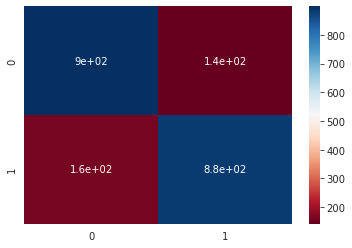

In [27]:
conf = confusion_matrix(y_train, pred_train)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [28]:
train_new["prediction"] = pred_train
train_probs = model.predict_proba(x_train)
train_new["prob_0"], train_new["prob_1"] = train_probs[:,0], train_probs[:,1]
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
2148,799026633,0,56,M,1,Uneducated,Married,$120K +,Blue,50,...,1.256,2502,55,0.571,0.093,0.606715,Married_Uneducated,0,0.572456,0.427544
2623,716584158,0,51,M,4,High School,Married,$80K - $120K,Blue,42,...,0.853,2090,47,0.880,0.174,1.204306,Married_High School,0,0.966595,0.033405
2283,719494983,0,26,M,0,Graduate,Single,Less than $40K,Blue,15,...,0.418,1997,44,0.419,0.755,1.036054,Single_Graduate,1,0.438594,0.561406
7819,783573408,0,42,F,4,College,Single,$40K - $60K,Blue,36,...,0.722,5267,83,0.886,0.830,0.405544,Single_College,0,0.982383,0.017617
6409,716901858,0,49,M,4,Doctorate,Married,$40K - $60K,Blue,39,...,0.562,3691,77,0.510,0.000,0.000000,Married_Doctorate,0,0.871965,0.128035


#### Initial test data results

In [29]:
pred_test_init = model.predict(x_test_init)
print(classification_report(y_test_init, pred_test_init))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1360
           1       0.50      0.84      0.62       261

    accuracy                           0.84      1621
   macro avg       0.73      0.84      0.76      1621
weighted avg       0.89      0.84      0.85      1621



<AxesSubplot:>

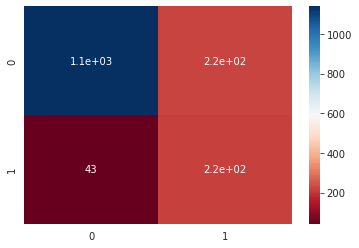

In [30]:
conf = confusion_matrix(y_test_init, pred_test_init)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [31]:
test_init["prediction"] = pred_test_init
test_init_probs = model.predict_proba(x_test_init)
test_init["prob_0"], test_init["prob_1"] = test_init_probs[:,0], test_init_probs[:,1]
test_init.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
2447,712040433,0,54,F,1,High School,Married,Less than $40K,Blue,43,...,0.697,2097,57,0.541,0.954,1.049118,Married_High School,0,0.936901,0.063099
2052,765824058,0,46,M,4,Doctorate,Married,$80K - $120K,Blue,39,...,0.907,3784,74,0.609,0.301,0.406712,Married_Doctorate,0,0.784131,0.215869
7923,718548558,0,53,F,3,Unknown,Single,Less than $40K,Blue,42,...,0.927,4272,70,0.750,0.700,0.477762,Single_Unknown,0,0.703560,0.296440
2293,710567508,0,53,M,3,High School,Married,$80K - $120K,Blue,44,...,0.571,1387,33,0.650,0.094,1.587599,Married_High School,0,0.585406,0.414594
4750,715776033,0,46,M,5,Uneducated,Single,$60K - $80K,Blue,33,...,0.572,4116,68,0.700,0.000,0.000000,Single_Uneducated,0,0.668906,0.331094


In [32]:
cross_val_predict(pipeline, x_train, y_train, cv = 5, method = "decision_function")

array([-0.06818524, -3.21968934,  0.05080515, ...,  3.02918715,
        1.64422897,  1.55594161])

#### Precision - Recall Curve

In [33]:
pred_test_dec = pipeline.decision_function(x_test_init)

In [34]:
pred_test_dec

array([-2.69787137, -1.28990219, -0.86430673, ...,  2.18960288,
       -2.73857448, -1.66956914])

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_test_init, pred_test_dec)

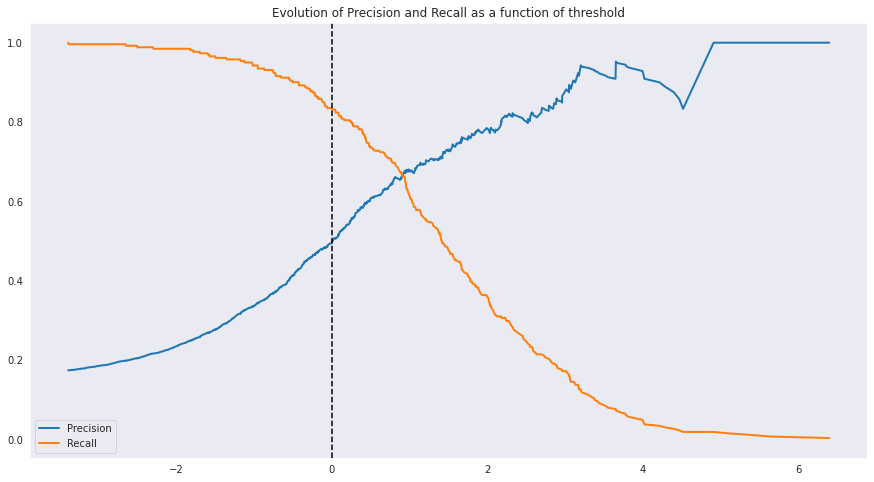

In [36]:
plt.figure(figsize = (15,8))
sns.lineplot(x = thresholds, y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
sns.lineplot(x = thresholds, y = recalls[:-1], markers = "g-", label="Recall", linewidth=2)
plt.axvline(x = 0, color = "black", linestyle = "dashed")
plt.title("Evolution of Precision and Recall as a function of threshold")
plt.show()

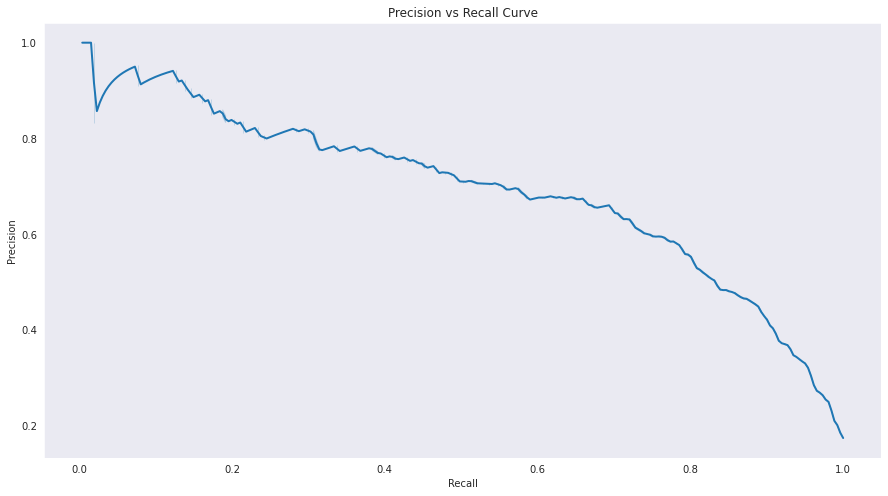

In [37]:
plt.figure(figsize = (15,8))
sns.lineplot(x = recalls[:-1], y = precisions[:-1], markers = "b--", linewidth=2)
plt.title("Precision vs Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show();

#### ROC Curve/ROC AUC Score

In [38]:
roc_auc_score(y_test_init, pred_test_dec)

0.9116520171286905

In [39]:
fpr, tpr, threshold_roc = roc_curve(y_test_init, pred_test_dec)

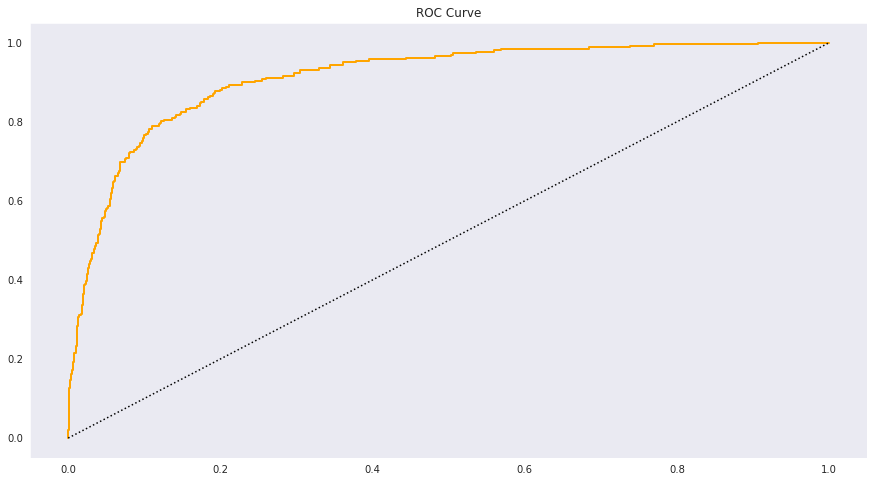

In [40]:
plt.figure(figsize = (15,8))
plt.title("ROC Curve")
plt.plot(fpr, tpr, linewidth=2, color = "orange")
plt.plot([0, 1], [0, 1], 'k:')
plt.show()

#### Precision-Recall Curve with threshold adjusted

In [41]:
y_scores = model.decision_function(x_test_init)

In [42]:
# Incrementing precision
idx_for_precision = (precisions >= 0.8).argmax()
threshold_for_precision = thresholds[idx_for_precision]
threshold_for_precision

2.1797193933226238

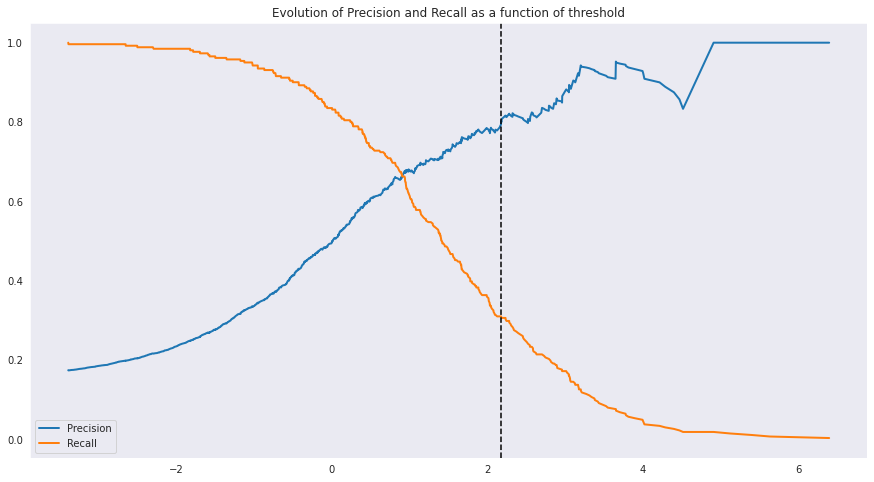

In [43]:
plt.figure(figsize = (15,8))
sns.lineplot(x = thresholds, y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
sns.lineplot(x = thresholds, y = recalls[:-1], markers = "g-", label="Recall", linewidth=2)
plt.axvline(x = threshold_for_precision, color = "black", linestyle = "dashed")
plt.title("Evolution of Precision and Recall as a function of threshold")
plt.show()

#### Results with adjusted threshold

In [44]:
pred_test_new = (y_scores >= threshold_for_precision)

In [45]:
print(classification_report(y_test_init, pred_test_new))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1360
           1       0.80      0.31      0.45       261

    accuracy                           0.88      1621
   macro avg       0.84      0.65      0.69      1621
weighted avg       0.87      0.88      0.85      1621



<AxesSubplot:>

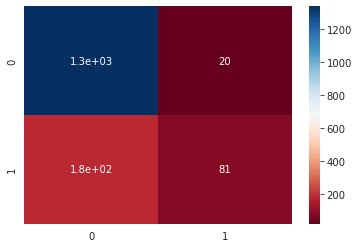

In [46]:
conf = confusion_matrix(y_test_init, pred_test_new)
sns.heatmap(conf, annot = True, cmap = "RdBu")

#### Feature Importance

In [47]:
pipeline.steps[2][1].coef_

array([[-2.07298275e-01, -2.99954575e-02,  3.48277214e-02,
        -1.05100480e-01, -3.18673441e-01, -1.10436833e+00,
        -2.36393996e+00,  7.62535673e-02,  4.13455993e-01,
        -6.29755087e-01, -7.45964901e-01, -5.42395095e-01,
         9.82883089e-02,  9.78976382e-01,  4.19154181e-01,
        -1.02782588e-01,  1.43506363e+00,  1.82567710e-01,
         9.59521138e-01, -9.45282338e-01, -1.51842121e+00,
        -4.72759060e+00,  3.22836319e+00, -8.34349927e-01,
        -1.18080768e+00,  1.00108056e+00, -7.44429059e-01,
         3.67600360e-01,  2.63609254e+00, -8.25689208e-01,
        -2.54884501e-01,  1.73257380e-01,  4.78437767e-01,
         3.49974063e-01, -6.52332155e-01, -3.57619203e-01,
         2.34550606e-01,  1.67877613e-01,  6.18609028e-01,
        -1.33014787e-02, -1.81524207e+00,  9.13398168e-01,
         1.61448025e+00, -6.11498335e+00,  5.93907792e+00,
        -6.66600591e-01,  1.77001894e+00, -4.12677709e+00,
         1.36660387e+00, -3.01188882e-15, -1.33566712e-1

In [48]:
vip = list(pipeline.steps[2][1].coef_[0])

In [49]:
pipeline.steps[0][1].transformers_[0][1].get_feature_names()

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_College', 'x0_Doctorate', 'x0_Graduate', 'x0_High School',
       'x0_Post-Graduate', 'x0_Uneducated', 'x0_Unknown', 'x1_Divorced',
       'x1_Married', 'x1_Single', 'x1_Unknown', 'x2_$120K +',
       'x2_$40K - $60K', 'x2_$60K - $80K', 'x2_$80K - $120K',
       'x2_Less than $40K', 'x2_Unknown', 'x3_Blue', 'x3_Gold',
       'x3_Platinum', 'x3_Silver', 'x4_Divorced_College',
       'x4_Divorced_Doctorate', 'x4_Divorced_Graduate',
       'x4_Divorced_High School', 'x4_Divorced_Post-Graduate',
       'x4_Divorced_Uneducated', 'x4_Divorced_Unknown',
       'x4_Married_College', 'x4_Married_Doctorate',
       'x4_Married_Graduate', 'x4_Married_High School',
       'x4_Married_Post-Graduate', 'x4_Married_Uneducated',
       'x4_Married_Unknown', 'x4_Single_College', 'x4_Single_Doctorate',
       'x4_Single_Graduate', 'x4_Single_High School',
       'x4_Single_Post-Graduate', 'x4_Single_Uneducated',
       'x4_Single_Unknown', 'x4_Unknown_College', 'x4_Unknown_Doctorate',
       '

In [50]:
#create df with vip info
feature_importances_info = pd.DataFrame({'feat_names':list(pipeline.steps[0][1].transformers_[0][1].get_feature_names()) + num, 'vip': vip})

#get sign and magnitude information
feature_importances_info = feature_importances_info.assign(feature_importances_mag = abs(feature_importances_info['vip']),
                             feature_importances_sign = np.sign(feature_importances_info['vip']))
feature_importances_info = feature_importances_info.set_index('feat_names').sort_values(by='feature_importances_mag', ascending=False)
feature_importances_info.head(10)

,vip,feature_importances_mag,feature_importances_sign
feat_names,,,
x4_Unknown_Doctorate,-6.114983,6.114983,-1.0
x4_Unknown_Graduate,5.939078,5.939078,1.0
x4_Divorced_College,-4.727591,4.727591,-1.0
x4_Unknown_Uneducated,-4.126777,4.126777,-1.0
x4_Divorced_Doctorate,3.228363,3.228363,1.0
x4_Married_College,2.636093,2.636093,1.0
x0_Unknown,-2.363940,2.363940,-1.0
x4_Single_Uneducated,-1.815242,1.815242,-1.0
x4_Unknown_Post-Graduate,1.770019,1.770019,1.0


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


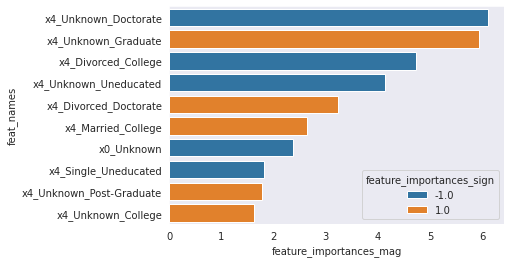

In [51]:
sns.barplot(y=feature_importances_info.index[:10], x='feature_importances_mag', hue='feature_importances_sign', 
            data=feature_importances_info[:10], orient='h', dodge=False);

#### Hold-out test data results

In [52]:
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1701
           1       0.47      0.84      0.61       325

    accuracy                           0.82      2026
   macro avg       0.72      0.83      0.75      2026
weighted avg       0.88      0.82      0.84      2026



<AxesSubplot:>

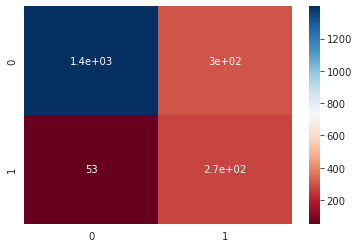

In [53]:
conf = confusion_matrix(y_test, pred_test)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [54]:
test["prediction"] = pred_test
test_probs = model.predict_proba(x_test)
test["prob_0"], test["prob_1"] = test_probs[:,0], test_probs[:,1]
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
3933,815240358,0,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1.063,3357,62,0.771,0.060,0.447125,Married_Uneducated,0,0.841940,0.158060
2790,779284833,0,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,0.758,3591,63,0.750,0.081,0.500975,Single_Post-Graduate,0,0.793161,0.206839
8663,719658858,0,50,F,4,Doctorate,Married,Unknown,Silver,36,...,0.666,7042,73,0.553,0.061,0.297643,Married_Doctorate,0,0.669119,0.330881
731,719459358,0,52,M,1,Doctorate,Married,$120K +,Blue,41,...,1.219,1751,48,0.920,0.029,0.564820,Married_Doctorate,0,0.668114,0.331886
3335,734924658,0,47,F,5,High School,Married,Less than $40K,Blue,36,...,0.873,4123,67,0.489,0.536,0.192093,Married_High School,0,0.838892,0.161108


#### Precision-Recall Curve

In [55]:
pred_test_dec2 = pipeline.decision_function(x_test)

In [56]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_test_dec2)

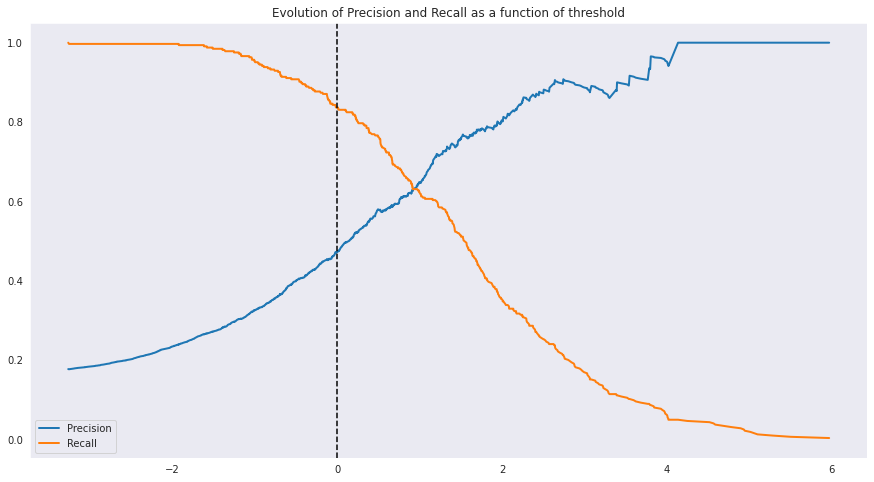

In [57]:
plt.figure(figsize = (15,8))
sns.lineplot(x = thresholds, y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
sns.lineplot(x = thresholds, y = recalls[:-1], markers = "g-", label="Recall", linewidth=2)
plt.axvline(x = 0, color = "black", linestyle = "dashed")
plt.title("Evolution of Precision and Recall as a function of threshold")
plt.show()

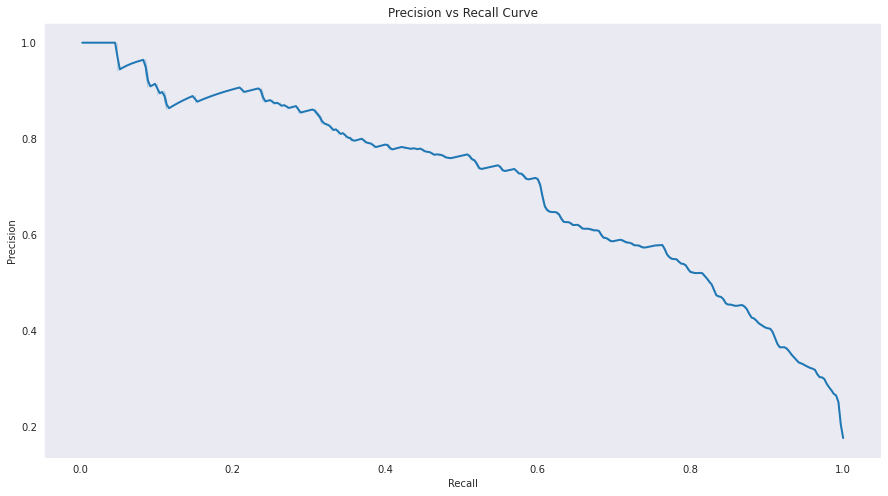

In [58]:
plt.figure(figsize = (15,8))
sns.lineplot(x = recalls[:-1], y = precisions[:-1], markers = "b--", linewidth=2)
plt.title("Precision vs Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show();

#### ROC-AUC Analysis

In [59]:
roc_auc_score(y_test, pred_test_dec2)

0.9142513453624564

In [60]:
fpr, tpr, threshold_roc = roc_curve(y_test, pred_test_dec2)

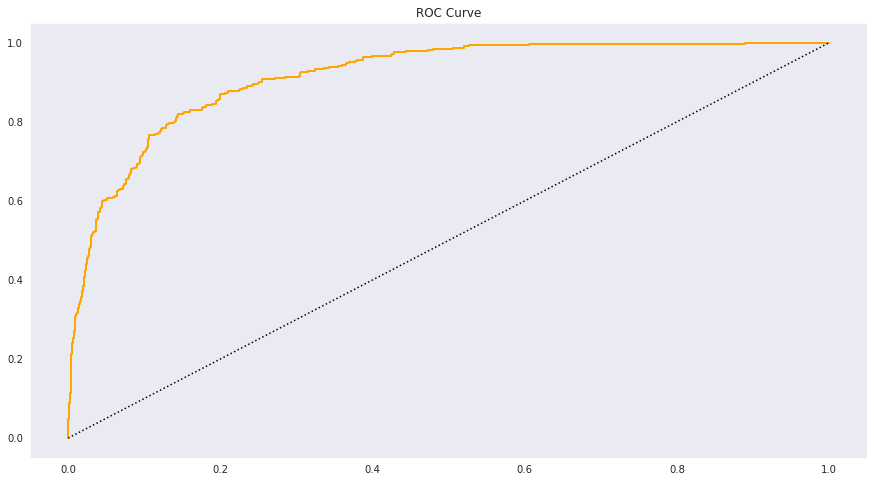

In [61]:
plt.figure(figsize = (15,8))
plt.title("ROC Curve")
plt.plot(fpr, tpr, linewidth=2, color = "orange")
plt.plot([0, 1], [0, 1], 'k:')
plt.show()